In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filename = '/content/Anxiety Study (Responses) - Form Responses 1.csv'
responses = pd.read_csv(filename)
responses

,Timestamp,Name,Age,Gender,Do you feel that you are punished without any crime?,Do you lose the balance of your mind even under ordinary pressure of circumstances?,Do you generally have unsteady mind?,Do you generally stutter while talking to strangers?,Do you sometimes feel that your life is useless?,Do you weep very easily?,...,Emphasizes my successes,Advices me,Celebrates in my successes with me,Discourages unhealthy foods,Gets anxious when I am late to reach home,Enquires how I spend money,Buy dresses for me according to the latest trends,Enquires how I spend my free time,Gives me timely advices,Does whatever I tell.
0,5/29/2024 15:50:09,Supriya Chordia,23,Female,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/29/2024 15:50:30,Pooja,21,Female,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/30/2024 1:14:43,Sasha,21,Female,No,No,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/30/2024 17:52:28,Krisha,22,Female,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/31/2024 16:50:37,Manoj,18,Male,Yes,No,Yes,Yes,Yes,No,...,4.0,1.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,6/16/2024 9:27:51,Nirmala Baghel,18,Female,No,No,Yes,No,No,Yes,...,5.0,4.0,5.0,3.0,5.0,5.0,3.0,4.0,4.0,4.0
265,6/16/2024 9:39:09,Nirmala Baghel,18,Female,Yes,Yes,No,No,Yes,No,...,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0
266,6/16/2024 10:24:39,Mahesh paddam,19,Male,No,No,No,No,No,No,...,1.0,1.0,2.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
267,6/17/2024 9:02:59,Lachmani,21,Female,No,No,Yes,Yes,No,Yes,...,1.0,1.0,2.0,2.0,3.0,5.0,3.0,4.0,2.0,1.0


In [ ]:
meta_columns = responses.columns[0:4]
anxiety_columns = responses.columns[4:94]
fes_columns = responses.columns[94:163]
parents_columns = responses.columns[164:]
items = [anxiety_columns, fes_columns, parents_columns]

df_anxiety = pd.merge(responses[meta_columns], responses[anxiety_columns], left_index=True, right_index=True)
df_fes = pd.merge(responses[meta_columns], responses[fes_columns], left_index=True, right_index=True)
df_parents = pd.merge(responses[meta_columns], responses[parents_columns], left_index=True, right_index=True)

In [ ]:
def anxiety_score(x):
  if x == 'Yes':
    return 1
  elif x == 'No':
    return 0
  else:
    return x

df_anxiety = df_anxiety.applymap(anxiety_score).set_index(list(meta_columns))
df_anxiety_score = pd.DataFrame(df_anxiety.sum(axis=1), columns = ['Anxiety score']).reset_index()
df_anxiety_score

,Timestamp,Name,Age,Gender,Anxiety score
0,5/29/2024 15:50:09,Supriya Chordia,23,Female,24
1,5/29/2024 15:50:30,Pooja,21,Female,16
2,5/30/2024 1:14:43,Sasha,21,Female,57
3,5/30/2024 17:52:28,Krisha,22,Female,20
4,5/31/2024 16:50:37,Manoj,18,Male,63
...,...,...,...,...,...
264,6/16/2024 9:27:51,Nirmala Baghel,18,Female,44
265,6/16/2024 9:39:09,Nirmala Baghel,18,Female,40
266,6/16/2024 10:24:39,Mahesh paddam,19,Male,30
267,6/17/2024 9:02:59,Lachmani,21,Female,45


<Axes: title={'center': 'Anxiety score'}, xlabel='Gender'>

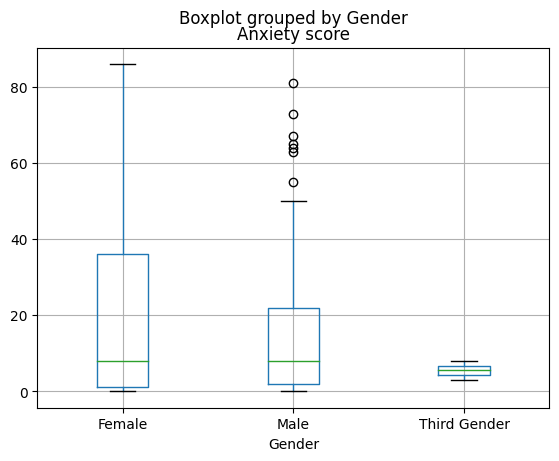

In [ ]:
df_anxiety_score.boxplot(column='Anxiety score',by='Gender')

In [ ]:
def remove_outliers(df, column_name):
  print('Shape of original dataframe =>',column_name, df.shape)
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range.

  # filter = (df[column_name] >= Q1 - 1.5 * IQR) & (df[column_name] <= Q3 + 1.5 *IQR)
  filter = (df[column_name] >= Q1) & (df[column_name] <= Q3)
  df_filtered = df[column_name].loc[filter]
  print(f'Shape of new dataframe {df_filtered.shape}')
  return df[column_name].loc[filter]

df_anxiety_score_m = df_anxiety_score[df_anxiety_score['Gender'] == 'Male']
df_anxiety_score_f = df_anxiety_score[df_anxiety_score['Gender'] == 'Female']

df_anxiety_score_m_outliers_removed = remove_outliers(df_anxiety_score_m,'Anxiety score')
df_anxiety_score_f_outliers_removed = remove_outliers(df_anxiety_score_f,'Anxiety score')

Shape of original dataframe => Anxiety score (93, 5)
Shape of new dataframe (51,)
Shape of original dataframe => Anxiety score (174, 5)
Shape of new dataframe (87,)


In [ ]:
sample_size = 50
df_anxiety_score_f_sample = df_anxiety_score_f_outliers_removed.sample(n=sample_size, random_state=1)
df_anxiety_score_m_sample = df_anxiety_score_m_outliers_removed.sample(n=sample_size, random_state=1)

In [ ]:
df_anxiety_score_m_sample.to_csv('male_anxiety_sample.csv')
df_anxiety_score_f_sample.to_csv('female_anxiety_sample.csv')

<Axes: >

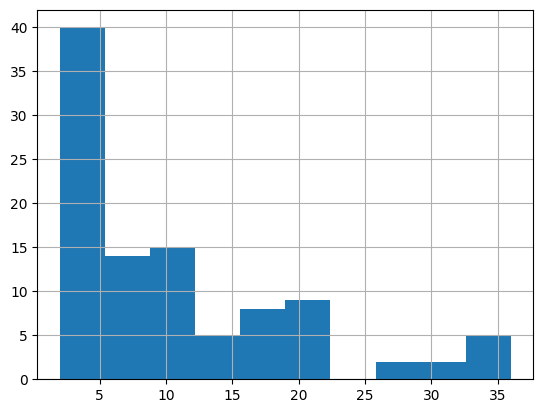

In [ ]:
pd.concat([df_anxiety_score_f_sample, df_anxiety_score_m_sample]).hist()
# df_anxiety_score_f_sample.hist()

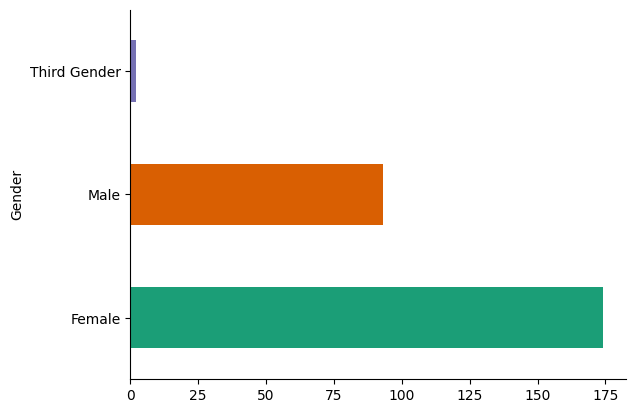

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df_anxiety_score.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

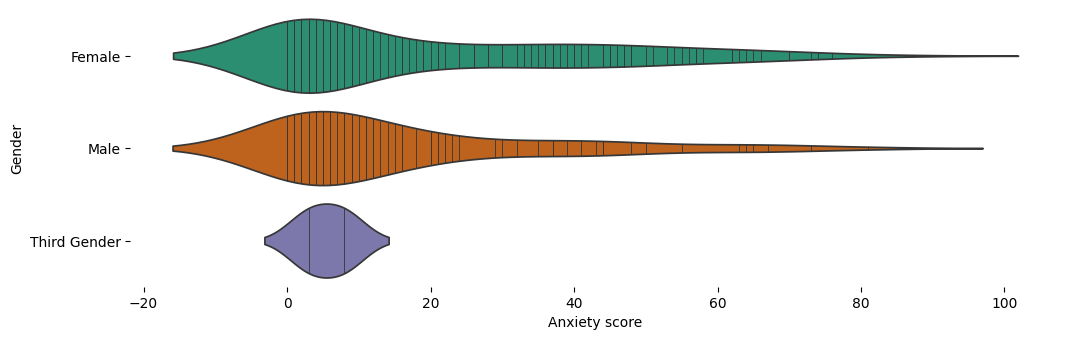

In [ ]:
# @title Gender vs Anxiety score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_anxiety_score['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_anxiety_score, x='Anxiety score', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df_anxiety.to_csv('anxiety_base.csv')
df_anxiety_score.to_csv('anxiety_score.csv')
df_fes.to_csv('fes_base.csv')
df_parents.to_csv('parent_base.csv')

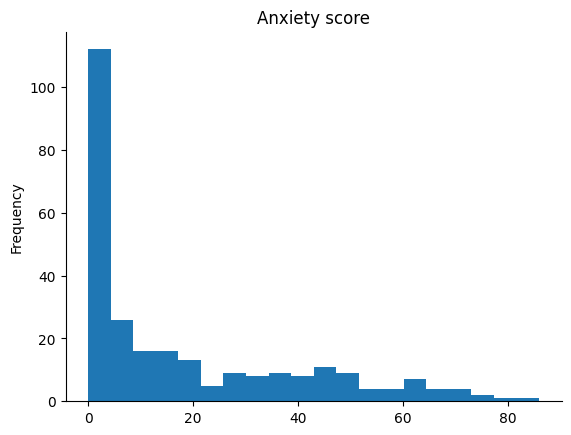

In [ ]:
# @title Anxiety score

from matplotlib import pyplot as plt
df_anxiety_score['Anxiety score'].plot(kind='hist', bins=20, title='Anxiety score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# FES

In [ ]:
df_fes

,Timestamp,Name,Age,Gender,We enjoy doing things together.,Family members often do not express their\nfeelings.,Breaking things in anger is quite common in\nour family.,Making decisions independently is strongly\nencouraged in our family.,In our family everyone is encouraged to play\nand interact with neighbours.,Responsibilities are not taken seriously in our\nfamily.,...,When a family vacation is planned we all give\nour suggestions.,Our family believes in not letting differences\ncontinue unsorted out.,If any member gets into trouble he/she gets\nhelp and sympathy from other family\nmembers.,"When in trouble, all of us stand up for our family members.",Quite often members of our family fail to\narrive at a mutually acceptable solution.,"When anyone makes a mistake, the other\nmembers ridicule him.","In our family, we enjoy sitting together and\ntalking to each other.",Showing anger by banging doors is rarely seen\nin our family.,Members of our family are very critical of\neach other.,All of us participate together in family\nfunctions/programmers.
0,5/29/2024 15:50:09,Supriya Chordia,23,Female,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5/29/2024 15:50:30,Pooja,21,Female,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5/30/2024 1:14:43,Sasha,21,Female,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/30/2024 17:52:28,Krisha,22,Female,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
4,5/31/2024 16:50:37,Manoj,18,Male,Strongly Agree,Neutral,Neutral,Disagree,Disagree,Neutral,...,Neutral,Neutral,Agree,Agree,Neutral,Agree,Agree,Strongly agree,Strongly agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,6/16/2024 9:27:51,Nirmala Baghel,18,Female,Agree,Agree,Neutral,Disagree,Neutral,Disagree,...,Neutral,Agree,Strongly Agree,Disagree,Agree,Agree,Disagree,Agree,Neutral,Agree
265,6/16/2024 9:39:09,Nirmala Baghel,18,Female,Agree,Neutral,Disagree,Agree,Neutral,Neutral,...,Neutral,Disagree,Agree,Agree,Neutral,Neutral,Agree,Neutral,Agree,Agree
266,6/16/2024 10:24:39,Mahesh paddam,19,Male,Agree,Disagree,Strongly Agree,Agree,Neutral,Agree,...,Neutral,Strongly agree,Agree,Neutral,Disagree,Strongly Agree,Agree,Neutral,Strongly agree,Agree
267,6/17/2024 9:02:59,Lachmani,21,Female,Agree,Agree,Neutral,Agree,Strongly Agree,Neutral,...,Strongly Disagree,Agree,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Neutral,Strongly Agree


In [ ]:
df_fes_numbered = df_fes.set_index(['Timestamp', 'Name', 'Age', 'Gender']).rename(columns={x:y for x,y in zip(df_fes.columns,range(-3,len(df_fes.columns)))}).dropna()
df_fes_numbered

,,,,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
Timestamp,Name,Age,Gender,,,,,,,,,,,,,,,,,,,,,
5/30/2024 17:52:28,Krisha,22,Female,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
5/31/2024 16:50:37,Manoj,18,Male,Strongly Agree,Neutral,Neutral,Disagree,Disagree,Neutral,Disagree,Disagree,Agree,Neutral,...,Neutral,Neutral,Agree,Agree,Neutral,Agree,Agree,Strongly agree,Strongly agree,Agree
5/31/2024 16:56:04,Pradish,18,Male,Strongly Agree,Strongly Disagree,Disagree,Disagree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Neutral,...,Neutral,Disagree,Disagree,Disagree,Agree,Strongly Disagree,Neutral,Strongly agree,Strongly agree,Strongly Agree
5/31/2024 18:40:57,vimal yadav,40,Male,Agree,Disagree,Strongly Disagree,Agree,Strongly Agree,Strongly Disagree,Neutral,Disagree,Strongly Agree,Agree,...,Agree,Agree,Agree,Strongly Agree,Disagree,Disagree,Agree,Strongly disagree,Strongly disagree,Strongly Agree
5/31/2024 19:22:27,REKHA KB,34,Female,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/16/2024 9:27:51,Nirmala Baghel,18,Female,Agree,Agree,Neutral,Disagree,Neutral,Disagree,Agree,Neutral,Neutral,Agree,...,Neutral,Agree,Strongly Agree,Disagree,Agree,Agree,Disagree,Agree,Neutral,Agree
6/16/2024 9:39:09,Nirmala Baghel,18,Female,Agree,Neutral,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Agree,Neutral,...,Neutral,Disagree,Agree,Agree,Neutral,Neutral,Agree,Neutral,Agree,Agree
6/16/2024 10:24:39,Mahesh paddam,19,Male,Agree,Disagree,Strongly Agree,Agree,Neutral,Agree,Agree,Strongly Agree,Disagree,Neutral,...,Neutral,Strongly agree,Agree,Neutral,Disagree,Strongly Agree,Agree,Neutral,Strongly agree,Agree


In [ ]:
df_fes_numbered.columns

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
      dtype='int64')

In [ ]:
negative = [17,49,31,2,18,32,50,3,26,33,45,57,64,23,30,65,68,12,20,34,40,58,35,41,53,6,15,29]
positive = [x for x in range(1,70) if x not in negative]

In [ ]:
sorted(positive)

[1,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 16,
 19,
 21,
 22,
 24,
 25,
 27,
 28,
 36,
 37,
 38,
 39,
 42,
 43,
 44,
 46,
 47,
 48,
 51,
 52,
 54,
 55,
 56,
 59,
 60,
 61,
 62,
 63,
 66,
 67,
 69]

In [ ]:
positive_scoring = {}
positive_scoring['strongly agree'] = 5
positive_scoring['agree'] = 4
positive_scoring['neutral'] = 3
positive_scoring['disagree'] = 2
positive_scoring['strongly disagree'] = 1

negative_scoring = {}
negative_scoring['strongly agree'] = 1
negative_scoring['agree'] = 2
negative_scoring['neutral'] = 3
negative_scoring['disagree'] = 4
negative_scoring['strongly disagree'] = 5

def scoring(x, positive=True):
  if pd.isnull(x):
    return x

  try:
    if str(x).lower() not in positive_scoring.keys():
      return x

    if positive:
      return positive_scoring[str(x).lower()]

    else:
      return negative_scoring[str(x).lower()]

  except Exception as e:
    return x

In [ ]:
for column in negative:
  # print(column)
  df_fes_numbered[column] = df_fes_numbered[column].apply(lambda x : scoring(x, positive=False))

for column in positive:
  # print(column)
  df_fes_numbered[column] = df_fes_numbered[column].apply(lambda x : scoring(x))

In [ ]:
pd.DataFrame(df_fes_numbered.reset_index().set_index('Name').loc['Lachmani']).to_csv('random.csv')

In [ ]:
df_fes_score = pd.DataFrame(df_fes_numbered.sum(axis=1), columns = ['FES score']).reset_index()
df_fes_score

,Timestamp,Name,Age,Gender,FES score
0,5/30/2024 17:52:28,Krisha,22,Female,211
1,5/31/2024 16:50:37,Manoj,18,Male,213
2,5/31/2024 16:56:04,Pradish,18,Male,209
3,5/31/2024 18:40:57,vimal yadav,40,Male,278
4,5/31/2024 19:22:27,REKHA KB,34,Female,222
...,...,...,...,...,...
261,6/16/2024 9:27:51,Nirmala Baghel,18,Female,204
262,6/16/2024 9:39:09,Nirmala Baghel,18,Female,222
263,6/16/2024 10:24:39,Mahesh paddam,19,Male,207
264,6/17/2024 9:02:59,Lachmani,21,Female,221


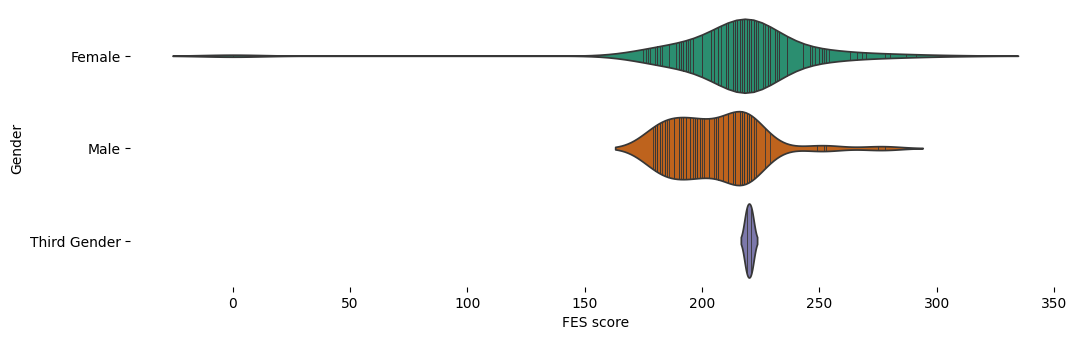

In [ ]:
# @title Gender vs FES score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_fes_score['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_fes_score, x='FES score', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: title={'center': 'FES score'}, xlabel='Gender'>

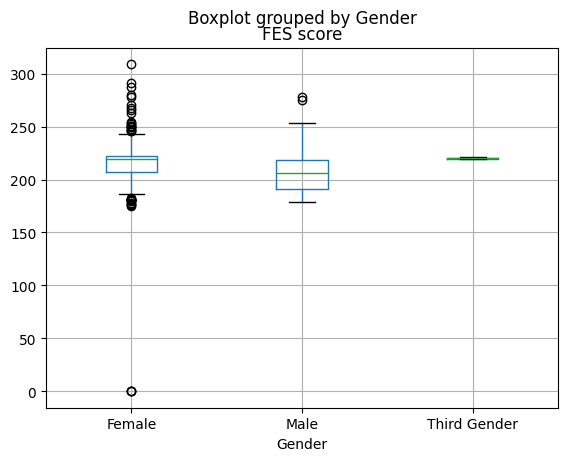

In [ ]:
df_fes_score.boxplot(column='FES score',by='Gender')

In [ ]:
df_fes_score.to_csv('fes_score.csv')

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
rng = np.random.default_rng()
s = rng.normal(mu, sigma, 1000)

In [ ]:
s

array([ 2.46381428e-02,  1.64352554e-01, -9.28409616e-02,  1.03050846e-01,
       -8.64576132e-02,  1.30182409e-01, -1.41880961e-01,  1.61386201e-01,
        5.99344842e-04, -1.09282307e-01,  2.37995695e-01, -1.79486372e-01,
        2.28339641e-02,  1.66225831e-01, -4.56611828e-02, -6.11448951e-04,
       -6.54378839e-02, -1.74019228e-01, -2.02849373e-01, -1.34396550e-01,
       -6.33145431e-02, -2.95487577e-02, -1.92444256e-01, -3.99239044e-02,
       -4.81558363e-02, -6.39784198e-02,  8.42540814e-02,  2.03237289e-02,
        5.46254328e-02,  8.77176267e-02, -1.16701263e-01,  1.95431010e-01,
       -1.41684219e-01,  1.64532239e-01, -8.97117919e-02,  8.86444873e-02,
       -3.02523814e-01, -4.51154574e-03, -1.89802200e-01,  1.40589682e-01,
        1.08984161e-01,  1.66547984e-01, -1.28557151e-01, -1.76347288e-01,
       -1.25553568e-01,  7.57932232e-02, -4.87493962e-02, -8.33777289e-03,
       -7.88961734e-03,  1.61868416e-02,  1.27020956e-01,  9.90007964e-02,
       -9.64110139e-03, -